# Model evaluation
- Gini coefficient
- K-S (Kolmogorove-Smirnov) test

### MSE, MAE, R2
- measure how close the predictions are to the target

### Gini, K-S
- measure how well the model can separate low values of the target from the high values

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

In [3]:
# generate random samples with big scaled feature

np.random.seed(42)

num_samples = 100
num_features = 20
xs = np.random.uniform(1, 5, size=(num_samples, num_features))
xs[:, -1] = np.random.uniform(100, 5000, size=num_samples)
w = np.random.rand(num_features)
noise_sigma = 50
ys = np.sum(xs * w, axis=1) + noise_sigma * np.random.randn(num_samples)

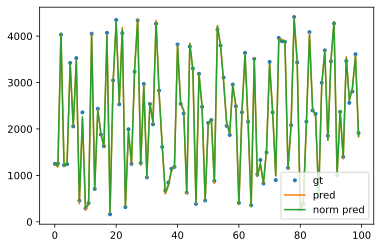

,LR(a=10000),Norm LR(a=0.001)
MSE,2166.610325,1610.117322
MAE,36.814633,32.636163
R^2,0.998639,0.998967
"W, MSE",0.185139,0.345902
"W, MAE",0.323194,0.496158


In [4]:
# solve regression & get predictions

w_hat = utils.solve(xs, ys, alpha=1e4)
y_hat = np.dot(xs, w_hat)
y_hat_norm, norm_w_hat = utils.solve_predict_norm(xs, ys, alpha=1e-3)

plt.plot(ys, marker=".", lw=0, label="gt")
plt.plot(y_hat, label="pred")
plt.plot(y_hat_norm, label="norm pred")
plt.legend()
plt.show()

res_df =  pd.DataFrame(data={
    "LR(a=10000)": [
        utils.mse(y_hat, ys), utils.mae(y_hat, ys), utils.r2(y_hat, ys),
        utils.mse(w_hat, w), utils.mae(w_hat, w)
    ],
    "Norm LR(a=0.001)": [
        utils.mse(y_hat_norm, ys), utils.mae(y_hat_norm, ys), utils.r2(y_hat_norm, ys),
        utils.mse(norm_w_hat, w), utils.mae(norm_w_hat, w)
    ],
}, columns=["LR(a=10000)", "Norm LR(a=0.001)"], index=["MSE", "MAE", "R^2", "W, MSE", "W, MAE"])

res_df

### Gini

In [5]:
z = np.array([20, 3, 10, 15])
idxs = np.argsort(z)
z[idxs]

array([ 3, 10, 15, 20])

In [6]:
y = ys - min(ys)  # make lowest value in y to 0
sort_idxs = np.argsort(y_hat)

lorenz_y_hat = np.cumsum(y[sort_idxs]) / sum(y)
lorenz_y = np.cumsum(sorted(y)) / sum(y)

middle_line = np.arange(len(ys)) / (len(ys) - 1)

ideal_gini = sum(middle_line - lorenz_y) # perfect model gini
real_gini = sum(middle_line - lorenz_y_hat)

gini_coef = real_gini / ideal_gini
gini_coef

0.9993556395808444

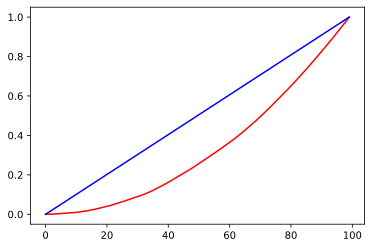

In [7]:
plt.plot(lorenz_y_hat, "r", label="pred")
plt.plot(middle_line, "b")
plt.show()

In [8]:
utils.gini(ys, y_hat_norm)

0.9994648467248355

In [9]:
print("source      gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys, y_hat), utils.mse(ys, y_hat)))
print("halves      gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys/2, y_hat/2), utils.mse(ys/2, y_hat/2)))
print("doubles     gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys*2, y_hat*2), utils.mse(ys*2, y_hat*2)))  # gini is not changed, but mse increase
print("shifted y   gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys+1000, y_hat), utils.mse(ys+1000, y_hat)))
print("half pred   gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys, y_hat/2), utils.mse(ys, y_hat/2)))
print("transf1     gini:{:.4f}   mse:{:.4f}".format(utils.gini(np.log(ys), y_hat/2), utils.mse(np.log(ys), y_hat/2)))  # this transform dose not change order
print("transf2     gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys**2, np.log(y_hat)), utils.mse(ys**2, np.log(y_hat))))
print("neg y       gini:{:.4f}   mse:{:.4f}".format(utils.gini(-ys, y_hat), utils.mse(-ys, y_hat)))  # the model is suck, the order is frustrating
print("neg pred    gini:{:.4f}   mse:{:.4f}".format(utils.gini(ys, -y_hat), utils.mse(ys, -y_hat)))
print("neg all     gini:{:.4f}   mse:{:.4f}".format(utils.gini(-ys, -y_hat), utils.mse(-ys, -y_hat)))  # order is not changed

source      gini:0.9994   mse:2166.6103
halves      gini:0.9994   mse:541.6526
doubles     gini:0.9994   mse:8666.4413
shifted y   gini:0.9994   mse:1017166.7557
half pred   gini:0.9994   mse:1676143.0480
transf1     gini:0.9991   mse:1656005.3958
transf2     gini:0.9994   mse:79169139452059.5312
neg y       gini:-1.0607   mse:26783644.5464
neg pred    gini:-1.0596   mse:26783644.5464
neg all     gini:0.9994   mse:2166.6103


### K-S for binary targets

[0.26170568 0.2469788  0.90625458 0.2495462  0.27194973 0.75939826
 0.44973984 0.77671056 0.06536616 0.48757119 0.0336136  0.0626532
 0.90643745 0.13924537 0.53242068 0.4110956  0.34734333 0.89983335
 0.0218234  0.66378969] 44.0


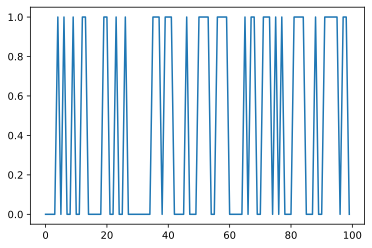

In [10]:
np.random.seed(42)

num_samples = 100
num_features = 20
xs = np.random.uniform(1, 5, size=(num_samples, num_features))
w = np.random.rand(num_features)
noise_sigma = 1
ys = np.float64(np.sum(xs * w, axis=1) + noise_sigma * np.random.randn(num_samples) > (np.mean(xs) * sum(w)))

# to check values over avg target
# note data type conversion
# what happens if we do not convert to float64

plt.plot(ys)
print(w, sum(ys))

In [11]:
w_hat = utils.solve(xs, ys, alpha=1)
y_hat = np.dot(xs, w_hat)
utils.gini(ys, y_hat), utils.mse(ys, y_hat)

(0.7115702479338843, 0.15713317268603244)

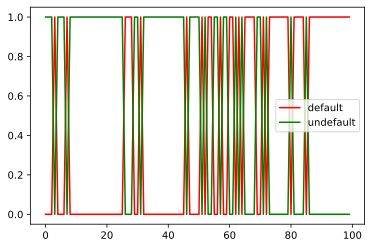

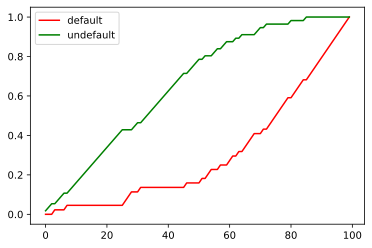

In [12]:
sort_idxs = np.argsort(y_hat)
plt.plot(ys[sort_idxs], "r", label="default")  # default customer
plt.plot(1-ys[sort_idxs], "g", label="undefault")  # undefault customer
plt.legend()

plt.figure()
plt.plot(np.cumsum(ys[sort_idxs]) / sum(ys), "r", label="default")
plt.plot(np.cumsum(1-ys[sort_idxs]) / sum(1-ys), "g", label="undefault")
plt.legend()
plt.show()

In [13]:
sort_idxs = np.argsort(y_hat)
cdf_1s = np.cumsum(ys[sort_idxs]) / sum(ys)
cdf_0s = np.cumsum(1-ys[sort_idxs]) / sum(1-ys)
ks = max(np.abs(cdf_0s - cdf_1s))
ks

0.6266233766233766

In [14]:
utils.ks(ys, y_hat)

0.6266233766233766

In [15]:
# ex 2.1.X: check function utils.ks. What is the difference from the implementation above? How can you explain it?

for binary target    : ks_old:0.6266  utils.ks:0.6266
for non-binary target: ks_old:0.0011  utils.ks:0.2264


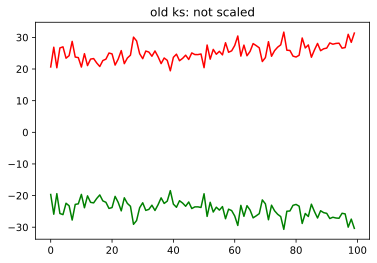

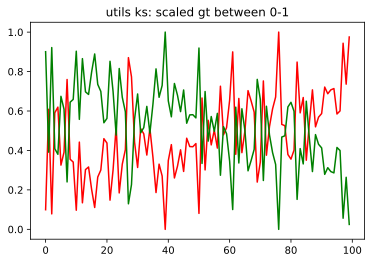

In [16]:
# ex

def ks_old(gt, pred):
    sort_idxs = np.argsort(pred)
    cdf1 = np.cumsum(gt[sort_idxs]) / sum(gt)
    cdf0 = np.cumsum(1-gt[sort_idxs]) / sum(1-gt)
    return np.max(np.abs(cdf0 - cdf1))

# non binary target (numeric)
np.random.seed(42)
ys0 = np.sum(xs * w, axis=1) + noise_sigma * np.random.randn(num_samples)

print("for binary target    : ks_old:{:.4f}  utils.ks:{:.4f}".format(ks_old(ys, y_hat), utils.ks(ys, y_hat)))
print("for non-binary target: ks_old:{:.4f}  utils.ks:{:.4f}".format(ks_old(ys0, y_hat), utils.ks(ys0, y_hat)))

plt.plot(ys0[sort_idxs], "r")
plt.plot(1-ys0[sort_idxs], "g")
plt.title("old ks: not scaled")

ys0_new = (ys0 - min(ys0)) / (max(ys0) - min(ys0))
plt.figure()
plt.plot(ys0_new[sort_idxs], "r")
plt.plot(1-ys0_new[sort_idxs], "g")
plt.title("utils ks: scaled gt between 0-1")
plt.show()

### Compare evaluations

In [17]:
def make_eval(eval_func, gt, pred):
    data = [
        eval_func(gt, pred),
        eval_func(gt/2, pred/2),
        eval_func(gt*2, pred*2),
        eval_func(gt + 1000, pred),
        eval_func(gt, pred/2),
        eval_func(np.log(gt), pred/2),
        eval_func(gt**2, np.log(pred)),
        eval_func(-gt, pred),
        eval_func(gt, -pred),
        eval_func(-gt, -pred),
    ]
    index = [
        "source",
        "halves",
        "doubles",
        "gt + 1000",
        "pred / 2",
        "log(gt), pred/2",
        "gt^2, log(pred)",
        "-gt",
        "-pred",
        "-gt, -pred",
    ]
    return pd.Series(data, index)

comp_df = pd.DataFrame({
    "Gini": make_eval(utils.gini, ys, y_hat),
    "KS": make_eval(utils.ks, ys, y_hat),
    "MSE": make_eval(utils.mse, ys, y_hat),
    "Old_KS": make_eval(ks_old, ys, y_hat)
})
comp_df

# halves old_ks is not good
# need ys -> 0-1 (for right KS)

/Users/jkpark/.pyenv/versions/3.7.6/envs/ml3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/jkpark/Documents/dev/ml-python3/ml-basic-workflow/utils.py:68: RuntimeWarning: invalid value encountered in subtract
  gt_0 = gt - min(gt)
/Users/jkpark/.pyenv/versions/3.7.6/envs/ml3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/Users/jkpark/Documents/dev/ml-python3/ml-basic-workflow/utils.py:81: RuntimeWarning: invalid value encountered in subtract
  corr_gt = (gt - min(gt)) / (max(gt) - min(gt))
/Users/jkpark/Documents/dev/ml-python3/ml-basic-workflow/utils.py:81: RuntimeWarning: invalid value encountered in true_divide
  corr_gt = (gt - min(gt)) / (max(gt) - min(gt))
/Users/jkpark/.pyenv/versions/3.7.6/envs/ml3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/jkpark/.py

,Gini,KS,MSE,Old_KS
source,0.711570,0.626623,1.571332e-01,6.266234e-01
halves,0.711570,0.626623,3.928329e-02,4.498834e-01
doubles,0.711570,0.626623,6.285327e-01,2.924242e+00
gt + 1000,0.711570,0.626623,9.999581e+05,1.544186e-07
pred / 2,0.711570,0.626623,2.281674e-01,6.266234e-01
"log(gt), pred/2",NaN,NaN,inf,NaN
"gt^2, log(pred)",0.602479,0.573052,NaN,5.730519e-01
-gt,-0.756645,0.626623,1.286060e+00,2.436869e-01
-pred,-0.747934,0.626623,1.286060e+00,6.266234e-01
"-gt, -pred",0.710133,0.626623,1.571332e-01,2.436869e-01
